<a href="https://colab.research.google.com/github/lamisghoualmi/App-Personal-Key-Indicators-of-Heart-Disease/blob/main/HeartDisease_Analysis_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart disease analysis and prediction**

In [15]:
import numpy as np
import pandas  as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns




**Statistics overview of the dataset**

In [93]:

df=pd.read_csv("heart_2020_cleaned.csv")
df
#Size of the data
print('df size', df.shape)
#Variables and their type
df.info()
#statistical desceiption of numerical variables 
df.describe()


df size (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16 

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


** Remove  Duplicates and check for the percentage of  missing values per variable**

In [94]:
#Remove duplicates from the dataset
df=df.drop_duplicates()
print('new df size', df.shape)
#------------------Check percentage of missing values for each variables----
for col in df.columns:
    PercentageMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(PercentageMissing *100)))

new df size (301717, 18)
HeartDisease - 0%
BMI - 0%
Smoking - 0%
AlcoholDrinking - 0%
Stroke - 0%
PhysicalHealth - 0%
MentalHealth - 0%
DiffWalking - 0%
Sex - 0%
AgeCategory - 0%
Race - 0%
Diabetic - 0%
PhysicalActivity - 0%
GenHealth - 0%
SleepTime - 0%
Asthma - 0%
KidneyDisease - 0%
SkinCancer - 0%



**Statistcal descritpion and visuzalization of  categorical variables**

____________________________________________________________________________________
Variable name: DiffWalking
Unique values are: ['No' 'Yes']
Number of unique values: 2
Frequency of each unique value in a catagorical variable
No     257362
Yes     44355
Name: DiffWalking, dtype: int64
____________________________________________________________________________________
Variable name: Race
Unique values are: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Number of unique values: 6
Frequency of each unique value in a catagorical variable
White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64
____________________________________________________________________________________
Variable name: Smoking
Unique values are: ['Yes' 'No']
Number of uniq

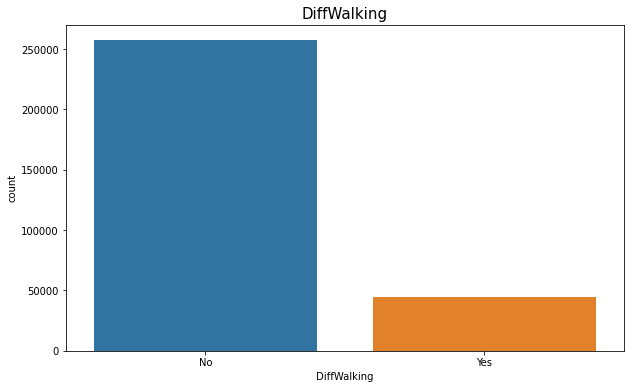

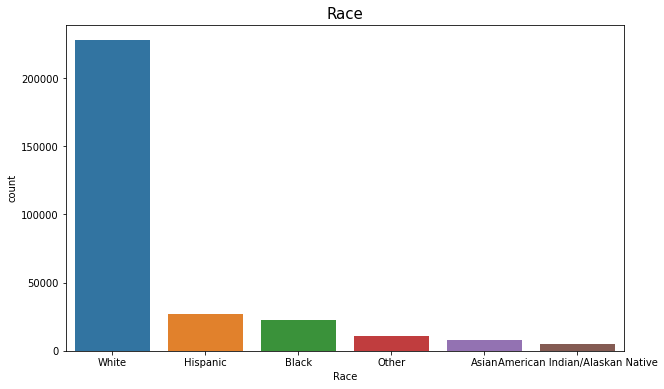

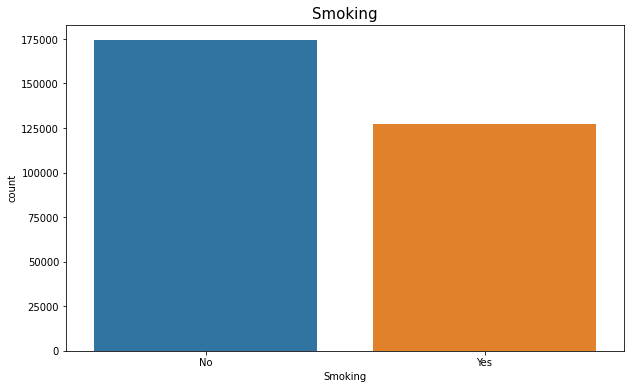

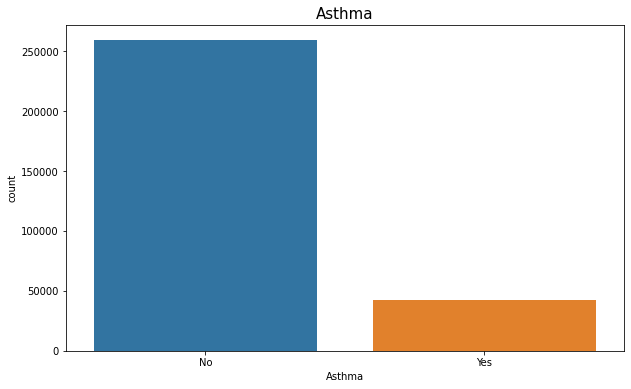

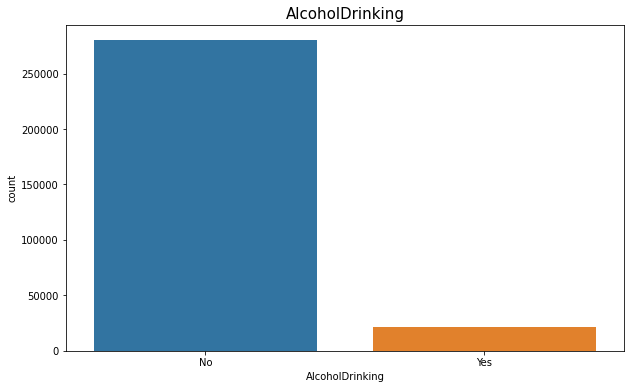

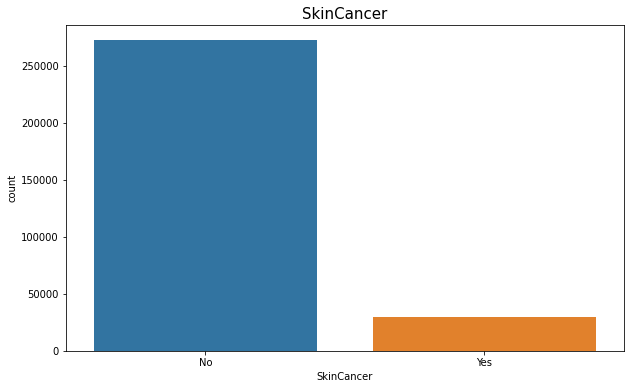

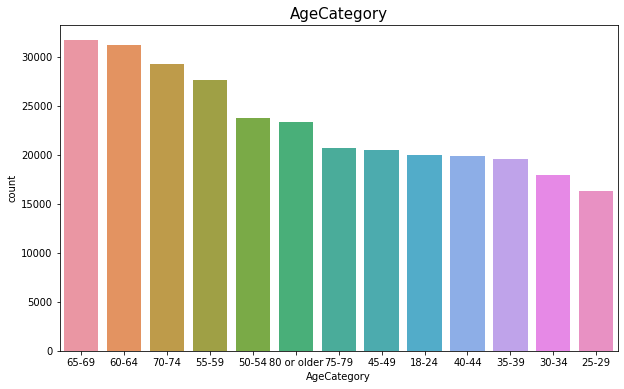

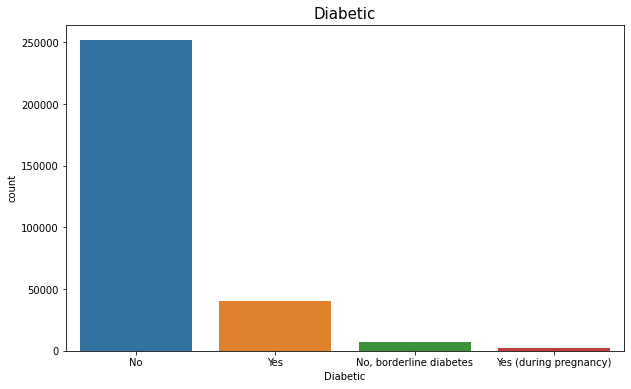

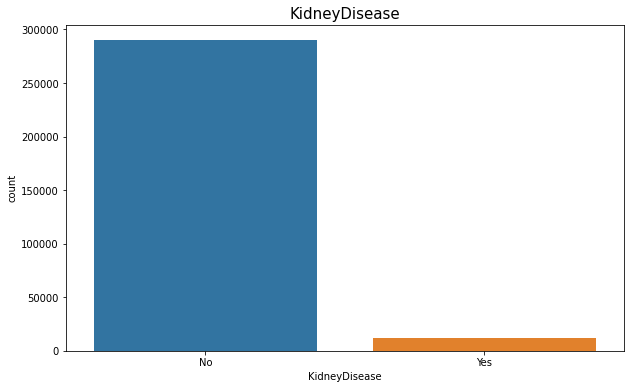

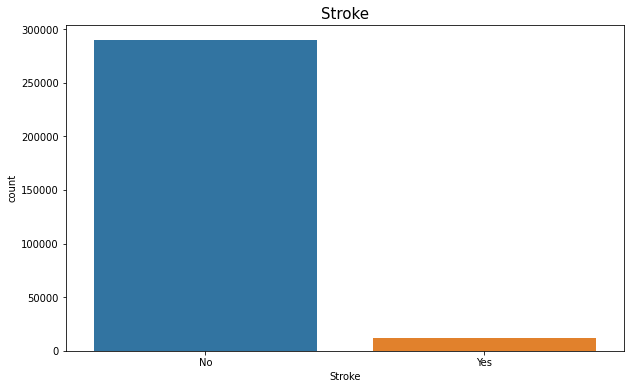

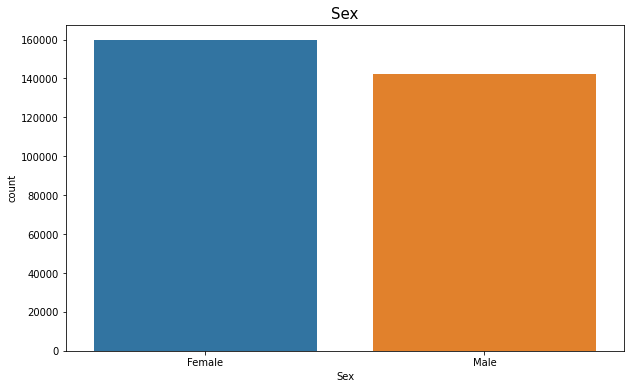

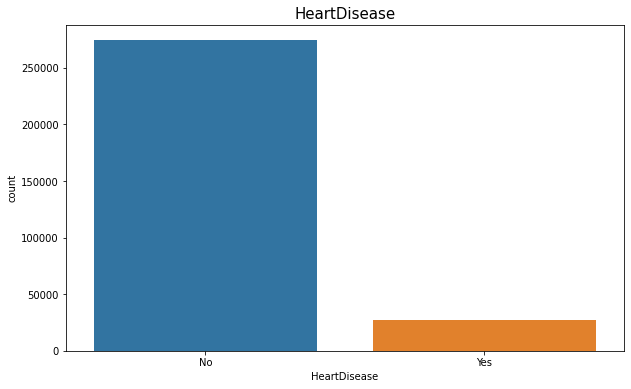

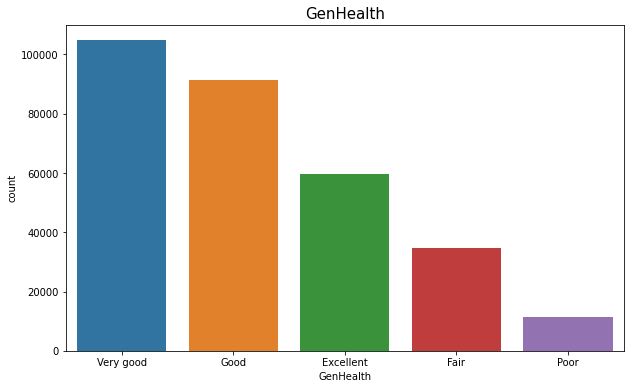

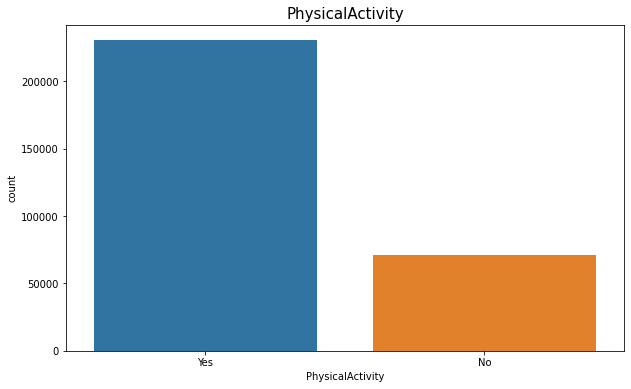

In [95]:


cols = df.columns
num_cols = df._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)
for i in range (lenght):
    print('____________________________________________________________________________________')
    #Variable
    print('Variable name:' ,Categ_cols[i])
    #Unique values 
    print('Unique values are:', df[Categ_cols[i]].unique())
    #Number of unique values
    print('Number of unique values:',df[Categ_cols[i]].nunique())
    # Frequencies of categorical variables
    FreqValue=df[Categ_cols[i]].value_counts()
    print('Frequency of each unique value in a catagorical variable')
    print(FreqValue)
    #Visualization of the categoricals data
    fig = plt.figure(figsize=(10,6))
    plt.title(Categ_cols[i],fontsize=15)
    ax = sns.countplot(x=df[Categ_cols[i]],  order=df[Categ_cols[i]].value_counts(ascending=False).index);

**Data mapping to prepare our data and built the prediciton model**

In [96]:
# ----------------------------------MAPPING------------------------
df.replace("Yes",1,inplace=True)
df.replace("No",0,inplace=True)

df.replace("18-24",0,inplace=True)
df.replace("25-29",1,inplace=True)
df.replace("30-34",2,inplace=True)
df.replace("35-39",3,inplace=True)
df.replace("40-44",4,inplace=True)
df.replace("45-49",5,inplace=True)
df.replace("50-54",6,inplace=True)
df.replace("55-59",7,inplace=True)
df.replace("60-64",8,inplace=True)
df.replace("65-69",9,inplace=True)
df.replace("70-74",10,inplace=True)
df.replace("75-79",11,inplace=True)
df.replace("80 or older",13,inplace=True)


df.replace("No, borderline diabetes",2,inplace=True)
df.replace("Yes (during pregnancy)",3,inplace=True)


df.replace("Excellent",0,inplace=True)
df.replace("Good",1,inplace=True)
df.replace("Fair",2,inplace=True)
df.replace("Very good",3,inplace=True)
df.replace("Poor",4,inplace=True)


df.replace("White",0,inplace=True)
df.replace("Other",1,inplace=True)
df.replace("Black",2,inplace=True)
df.replace("Hispanic",3,inplace=True)
df.replace("Asian",4,inplace=True)
df.replace("American Indian/Alaskan Native",4,inplace=True)


df.replace("Female",0,inplace=True)
df.replace("Male",1,inplace=True)


df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,0,1,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,0,0,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,0,1,1,2,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,0,0,0,1,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,0,0,1,3,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,8,3,1,0,2,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,3,3,0,1,3,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,5,3,0,1,1,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,1,3,0,0,1,12,0,0,0


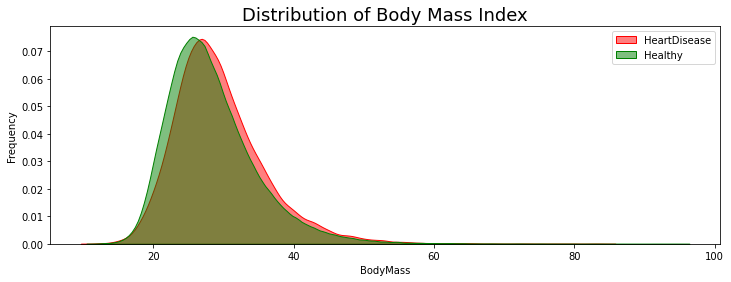

In [108]:
fig, ax = plt.subplots(figsize = (12,4))

sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="green", label="Healthy", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()


**Correlation and visualization using graph network**

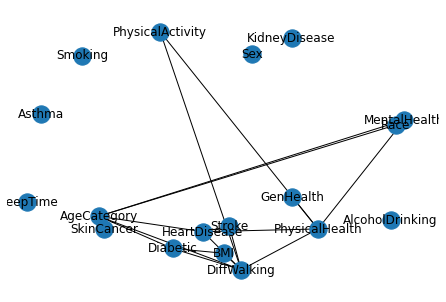

In [100]:
import networkx as nx

CorrelMat= df.corr()

G=nx.Graph()
stocks = CorrelMat.index.values
CorrelMat = np.asmatrix(CorrelMat)
CorrelMat[abs(CorrelMat) < .15] = 0
CorrelMat[abs(CorrelMat) ==1] = 0
G = nx.from_numpy_matrix(CorrelMat)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)
nx.draw(G, with_labels=True)
plt.show(G)




****Correlation and visualization using heatmap**

In [101]:
import plotly
import plotly.express as px
fig = px.imshow(df.corr(),color_continuous_scale="Blues")
fig.show()

**Get the target data and built the ML model**

In [ ]:

#Replace BMI values by subgroups
df['BMI'].mask(df['BMI']  < 18.5, 0, inplace=True)
df['BMI'].mask(df['BMI'].between(18.5,25), 1, inplace=True)
df['BMI'].mask(df['BMI'].between(25,30), 2, inplace=True)
df['BMI'].mask(df['BMI']  > 30, 3, inplace=True)
#Get the target and remove it from the dataset
target=df["HeartDisease"]
df.drop(["HeartDisease"], axis=1, inplace=True)